In [ ]:
from sympy import symbols, Max, sqrt

# Define variables and parameters
x1, x2 = symbols('x1 x2')
g1 = x1**2 + x2**2 - 225
g2 = x1 + x2 - 10
g3 = 4*x1 - 3*x2 - 24
k1, k2, k3 = symbols('k1 k2 k3')

# Define the penalty function
penalty = k1 * Max(0, g1)**2 + k2 * Max(0, g2)**2 + k3 * Max(0, g3)**2

# Display the penalty function
print("Penalty function:")
print(penalty)


Penalty function:
k1*Max(0, x1**2 + x2**2 - 225)**2 + k2*Max(0, x1 + x2 - 10)**2 + k3*Max(0, 4*x1 - 3*x2 - 24)**2


In [ ]:
from sympy import latex

# Generate LaTeX code for the penalty function
latex_penalty = latex(penalty)

# Display LaTeX code
print("LaTeX code for the penalty function:")
print(latex_penalty)


LaTeX code for the penalty function:
k_{1} \max\left(0, x_{1}^{2} + x_{2}^{2} - 225\right)^{2} + k_{2} \max\left(0, x_{1} + x_{2} - 10\right)^{2} + k_{3} \max\left(0, 4 x_{1} - 3 x_{2} - 24\right)^{2}


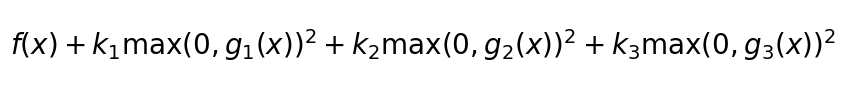

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Define the penalty function in LaTeX format
latex_penalty = r"$f(x) + k_1 \max(0, g_1(x))^2 + k_2 \max(0, g_2(x))^2 + k_3 \max(0, g_3(x))^2$"

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 1))
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

# Add the penalty function equation
ax.text(0.5, 0.5, latex_penalty, fontsize=20, ha='center', va='center')

# Remove the axis
ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('penalty_function.png', bbox_inches='tight', dpi=300)

# Show the image (optional)
plt.show()


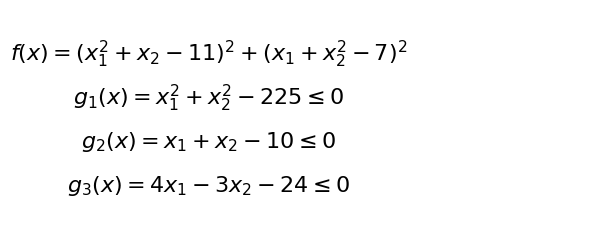

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Define the objective function and constraints in LaTeX format
latex_objective_function = r"$f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$"
latex_circle_constraint = r"$g_1(x) = x_1^2 + x_2^2 - 225 \leq 0$"
latex_linear_constraint = r"$g_2(x) = x_1 + x_2 - 10 \leq 0$"
latex_debs_constraint = r"$g_3(x) = 4x_1 - 3x_2 - 24 \leq 0$"

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.set_xlim(0, 10)
ax.set_ylim(0, 2.5)

# Add the objective function equation
ax.text(0.5, 2, latex_objective_function, fontsize=16, ha='center', va='center')

# Add the circle constraint equation
ax.text(0.5, 1.5, latex_circle_constraint, fontsize=16, ha='center', va='center')

# Add the linear constraint equation
ax.text(0.5, 1, latex_linear_constraint, fontsize=16, ha='center', va='center')

# Add the Debs constraint equation
ax.text(0.5, 0.5, latex_debs_constraint, fontsize=16, ha='center', va='center')

# Remove the axis
ax.axis('off')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('objective_and_constraints.png', bbox_inches='tight', dpi=300)

# Show the image (optional)
plt.show()


In [ ]:
from sympy import symbols, Eq, solve

# Define symbols
x1, x2 = symbols('x1 x2')

# Equations based on constraints
circle_eq = Eq(x1**2 + x2**2, 225)
linear_eq = Eq(x1 + x2, 10)
debs_eq = Eq(4*x1 - 3*x2, 24)

# Solve for intersection of linear and Debs constraints
linear_debs_intersection = solve((linear_eq, debs_eq), (x1, x2))

# Solve for intersections of the circle and linear constraint
circle_linear_intersections = solve((circle_eq, Eq(x2, 10 - x1)), x1)

# Solve for intersections of the circle and Debs constraint
# Substituting x2 from the Debs equation to the circle equation
debs_x2 = solve(debs_eq, x2)[0]  # Solve debs_eq for x2
circle_debs_intersections = solve(circle_eq.subs(x2, debs_x2), x1)

# Intersection points
linear_debs_intersection, circle_linear_intersections, circle_debs_intersections

({x1: 54/7, x2: 16/7}, [], [96/25 - 9*sqrt(561)/25, 96/25 + 9*sqrt(561)/25])

The red dashed line represents the circle constraint (x1/2+x2/2=225), defining a circular boundary.
The blue line indicates the linear constraint (x1+x2=10), which is a straight line limiting the feasible region to one side of it.
The green line shows the Debs constraint (4x1−3x2=24), another linear boundary that further restricts the feasible area.

The feasible region would lie within the intersection of these constraints. Specifically, it would be an area that:

Is inside the circle defined by the red dashed line.
Lies below the blue line (for the linear constraint).
Lies above the green line (for the Debs constraint).
This visualisation aids in understanding how the constraints define the bounds of the search space for optimisation, highlighting the need for careful selection of the initial bounds for any of the optimisation algorithms used.

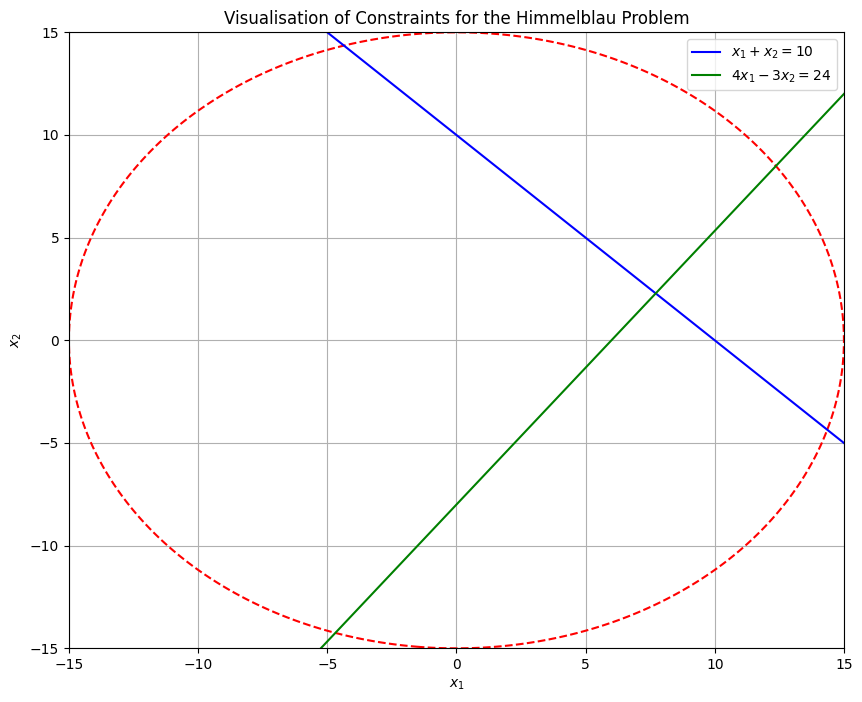

In [ ]:
# Plotting the constraints again without the incorrect fill_between usage
plt.figure(figsize=(10, 8))

# Circle constraint
plt.contour(X1, X2, X1**2 + X2**2, levels=[225], colors='r', linestyles='dashed', linewidths=1.5)

# Linear constraint
plt.plot(x1, 10 - x1, 'b-', label='$x_1 + x_2 = 10$')

# Debs constraint
plt.plot(x1, x2_debs, 'g-', label='$4x_1 - 3x_2 = 24$')

# Highlighting the feasible region visually
# Note: A more precise approach would involve calculating the exact boundaries of the feasible region.
# Here, the visualisation focuses on the intersection of constraints.

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Visualisation of Constraints for the Himmelblau Problem')
plt.legend()
plt.grid(True)
plt.show()

To more accurately highlight the feasible region defined by the constraints within the graph, I'll use a method that involves shading the region that meets all the constraints simultaneously. This involves:

Using the meshgrid of x1 and x2 values to evaluate each constraint across the grid.

Identifying the region where all constraints are simultaneously satisfied.
Shading this region to visually represent the feasible area.

Given the constraints:

Circle constraint - x12+x22≤225

Linear constraint - x1+x2≤10

Debs constraint - 4x1-3x2≥24

We can use these to compute a logical mask that indicates the feasibility of each point in the grid. Then, we'll overlay this mask on the plot to highlight the feasible region.

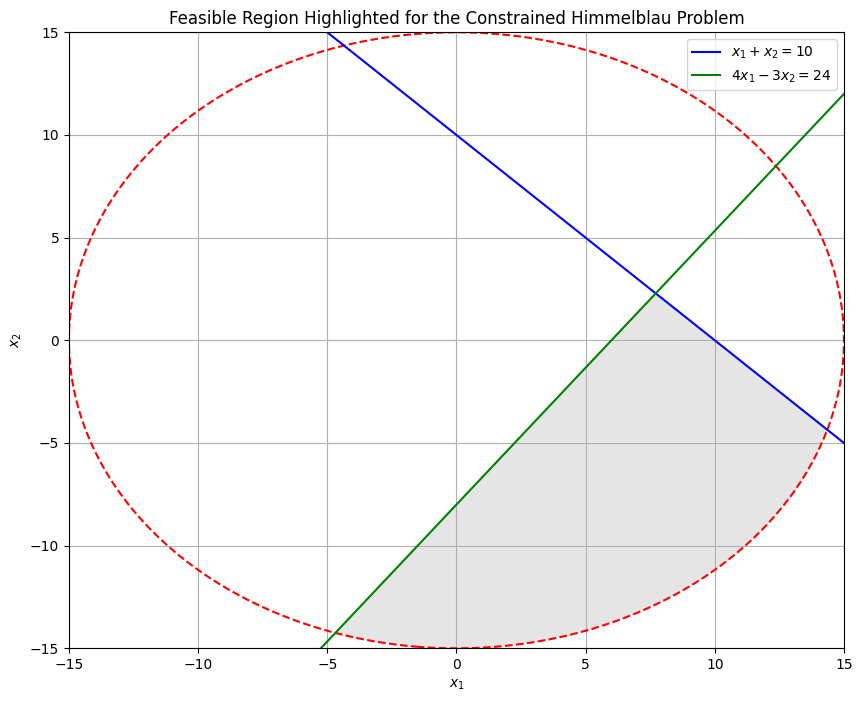

In [ ]:
# Calculate the constraints across the grid
Circle_mask = X1**2 + X2**2 <= 225
Linear_mask = X1 + X2 <= 10
Debs_mask = 4*X1 - 3*X2 >= 24

# Compute the overall feasibility mask
Feasible_mask = Circle_mask & Linear_mask & Debs_mask

# Plotting constraints and the feasible region
plt.figure(figsize=(10, 8))

# Plotting the circle constraint
plt.contour(X1, X2, X1**2 + X2**2, levels=[225], colors='r', linestyles='dashed', linewidths=1.5)

# Plotting the linear constraint
plt.plot(x1, 10 - x1, 'b-', label='$x_1 + x_2 = 10$')

# Plotting the Debs constraint
plt.plot(x1, x2_debs, 'g-', label='$4x_1 - 3x_2 = 24$')

# Highlighting the feasible region by overlaying a mask
plt.contourf(X1, X2, Feasible_mask, levels=[0.5, 1], alpha=0.2, colors='grey')

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Feasible Region Highlighted for the Constrained Himmelblau Problem')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sympy import symbols, Function, Eq, Max, solve, init_printing

# Initialize pretty printing
init_printing(use_unicode=True)

# Define symbols
x1, x2, k1, k2, k3 = symbols('x1 x2 k1 k2 k3')

# Define the penalty parameters
k_values = {k1: 1000, k2: 1000, k3: 1000}

# Define the constraints
g1 = x1**2 + x2**2 - 225
g2 = x1 + x2 - 10
g3 = 4*x1 - 3*x2 - 24

# Define the objective function
f = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# Define the cost function with penalties
cost = f + k1 * Max(0, g1)**2 + k2 * Max(0, g2)**2 + k3 * Max(0, g3)**2

# Display the cost function
cost


                                                                              
                              2                          2                    
k₁⋅Max(0, x1**2 + x2**2 - 225)  + k₂⋅Max(0, x1 + x2 - 10)  + k₃⋅Max(0, 4*x1 - 

                            2                  2
          2   ⎛       2    ⎞    ⎛  2          ⎞ 
3*x2 - 24)  + ⎝x₁ + x₂  - 7⎠  + ⎝x₁  + x₂ - 11⎠ 

In [ ]:
from sympy import symbols, Function, Eq, Max, init_printing, latex
from IPython.display import display, Math

# Initialize pretty printing
init_printing(use_unicode=True)

# Define symbols
x1, x2, k1, k2, k3 = symbols('x1 x2 k1 k2 k3')

# Define the penalty parameters with hypothetical values
k_values = {k1: 1000, k2: 1000, k3: 1000}

# Define the constraints
g1 = x1**2 + x2**2 - 225
g2 = x1 + x2 - 10
g3 = 4*x1 - 3*x2 - 24

# Define the objective function
f = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# Define the cost function with penalties
cost = f + k1 * Max(0, g1)**2 + k2 * Max(0, g2)**2 + k3 * Max(0, g3)**2

# Display decision variables
display(Math(r'\text{{Decision Variables: }} x1, x2'))

# Display constraints with explanations
display(Math(r'g1 = {} \quad \text{{(Circle constraint)}}'.format(latex(g1))))
display(Math(r'g2 = {} \quad \text{{(Linear constraint)}}'.format(latex(g2))))
display(Math(r'g3 = {} \quad \text{{(Debs constraint)}}'.format(latex(g3))))

# Display penalty parameters
display(Math(r'k1, k2, k3 = 1000 \quad \text{{(Penalty parameters)}}'))

# Display objective function
display(Math(r'f = {} \quad \text{{(Objective function)}}'.format(latex(f))))

# Display overall cost function with penalties
display(Math(r'\text{{Cost function with penalties: }}'))
display(Math(r'\text{{cost}} = {}'.format(latex(cost))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>